## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


In [1]:
import os
import keras

# Try to enable GPU (optional)


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理

def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x =x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
x_train[1]

array([0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
       0.56470588])

In [18]:
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    X = keras.layers.Dense(units=512, activation='relu')(input_layer)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=128, activation='relu')(X)
    X = keras.layers.Dense(units=64, activation='relu')(X)
    X = keras.layers.Dense(units=32, activation='relu')(X)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(X)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

In [19]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [20]:

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [21]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 324us/step - loss: 2.0723 - acc: 0.2171 - val_loss: 1.8662 - val_acc: 0.3250
Epoch 2/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.8386 - acc: 0.3323 - val_loss: 1.7557 - val_acc: 0.3566
Epoch 3/100
50000/50000 [==============================] - 15s 290us/step - loss: 1.7634 - acc: 0.3656 - val_loss: 1.6718 - val_acc: 0.3939
Epoch 4/100
50000/50000 [==============================] - 15s 290us/step - loss: 1.7062 - acc: 0.3882 - val_loss: 1.6365 - val_acc: 0.4114
Epoch 5/100
50000/50000 [==============================] - 14s 290us/step - loss: 1.6642 - acc: 0.4017 - val_loss: 1.5811 - val_acc: 0.4313
Epoch 6/100
50000/50000 [==============================] - 14s 289us/step - loss: 1.6390 - acc: 0.4102 - val_loss: 1.5639 - val_acc: 0.4425
Epoch 7/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.6090 - acc: 0.4239 - val_l

Epoch 59/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.2120 - acc: 0.5617 - val_loss: 1.3762 - val_acc: 0.5109
Epoch 60/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.2045 - acc: 0.5681 - val_loss: 1.3502 - val_acc: 0.5194
Epoch 61/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.1976 - acc: 0.5689 - val_loss: 1.3221 - val_acc: 0.5313
Epoch 62/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.1972 - acc: 0.5689 - val_loss: 1.3716 - val_acc: 0.5179
Epoch 63/100
50000/50000 [==============================] - 14s 289us/step - loss: 1.1936 - acc: 0.5694 - val_loss: 1.3655 - val_acc: 0.5158
Epoch 64/100
50000/50000 [==============================] - 14s 289us/step - loss: 1.1848 - acc: 0.5737 - val_loss: 1.3606 - val_acc: 0.5160
Epoch 65/100
50000/50000 [==============================] - 14s 289us/step - loss: 1.1816 - acc: 0.5745 - val_loss: 1.3542 - val_acc: 0.5212
Epoch 66/100


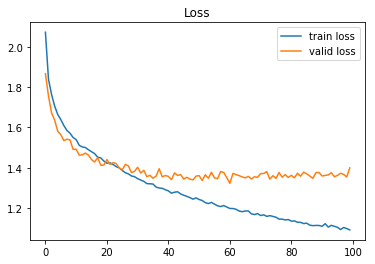

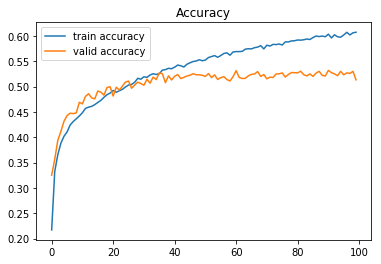

In [23]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

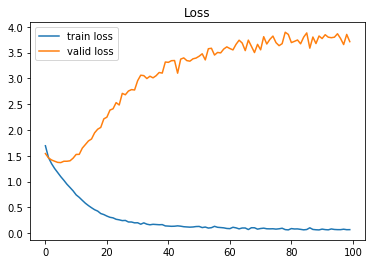

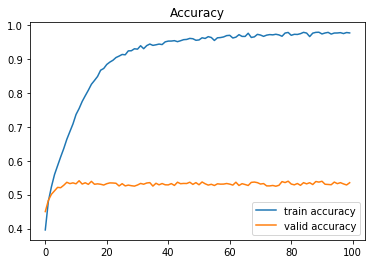

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()